<a href="https://colab.research.google.com/github/ShauryaDamathia/ML-LAB-EVALUATION/blob/main/ML_LAB_EVALUATION_102203798.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

**UPLOADING THE DATASET**

In [9]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
data = pd.read_csv('Fuel_cell_performance_data-Full.csv')
data.head()


Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full (1).csv


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Target1,Target2,Target3,Target4,Target5
0,52.9,1.33,49.1,37.13,129.43,35.0,0.281,112.7,207,0.55,98.971,2.87,1362,15.9,429,0.959,1.531,79.3,4.19,33.29
1,87.6,2.12,48.8,42.10,171.07,37.6,0.153,157.4,188,0.86,101.179,2.34,5130,26.1,1819,0.728,1.690,57.2,5.19,34.50
2,73.3,2.72,93.8,20.11,163.69,44.3,0.367,348.7,270,1.87,98.919,2.13,7811,16.7,1763,0.784,1.865,61.6,7.77,129.28
3,65.6,2.58,48.1,35.11,63.37,32.5,0.279,321.2,322,1.75,101.560,2.91,1641,32.1,203,0.884,1.920,71.3,8.40,186.65
4,39.6,2.58,49.3,32.93,63.40,47.0,0.149,205.6,203,1.55,98.148,1.93,7648,27.5,276,0.736,1.711,58.5,4.75,52.32


**PREPARE FEATURES AND TARGET**

In [10]:
# Select Target4 and drop other targets
target_column = 'Target4'
features = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target4', 'Target5'])
target = data[target_column]

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

**TRAIN AND EVALUATE MODELS**

In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
    "CatBoost Regressor": CatBoostRegressor(verbose=0, random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Store results
    results[name] = {"MSE": mse, "R2": r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:01:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Linear Regression: MSE = 4.899, R² = -0.017
Decision Tree Regressor: MSE = 11.109, R² = -1.306
Random Forest Regressor: MSE = 5.077, R² = -0.054
Gradient Boosting Regressor: MSE = 5.441, R² = -0.129
Support Vector Regressor: MSE = 4.937, R² = -0.025
K-Nearest Neighbors Regressor: MSE = 5.865, R² = -0.218
AdaBoost Regressor: MSE = 4.852, R² = -0.007
XGBoost Regressor: MSE = 6.529, R² = -0.355
CatBoost Regressor: MSE = 5.448, R² = -0.131
Extra Trees Regressor: MSE = 5.169, R² = -0.073


**VISUALIZING THROUGH GRAPHS**

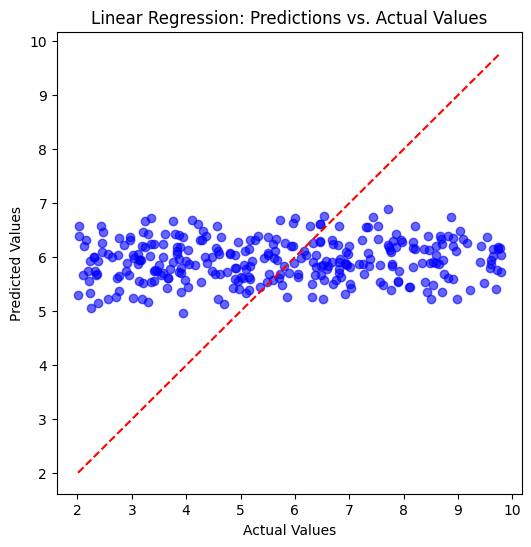

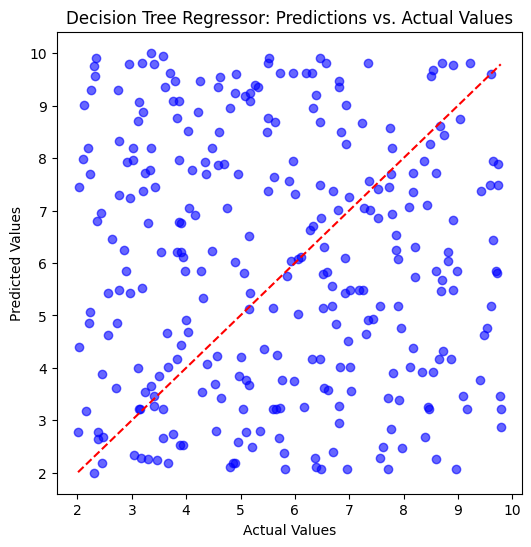

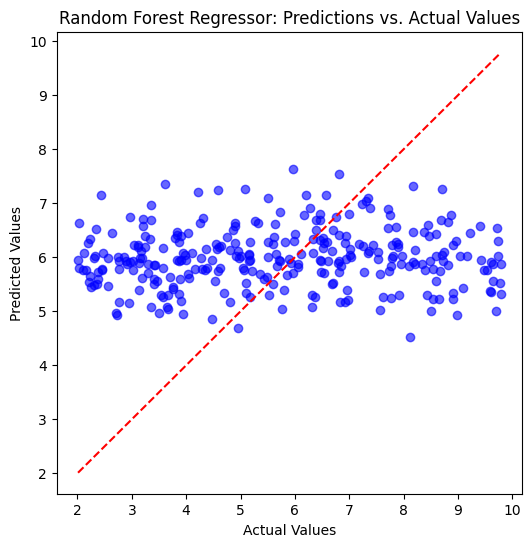

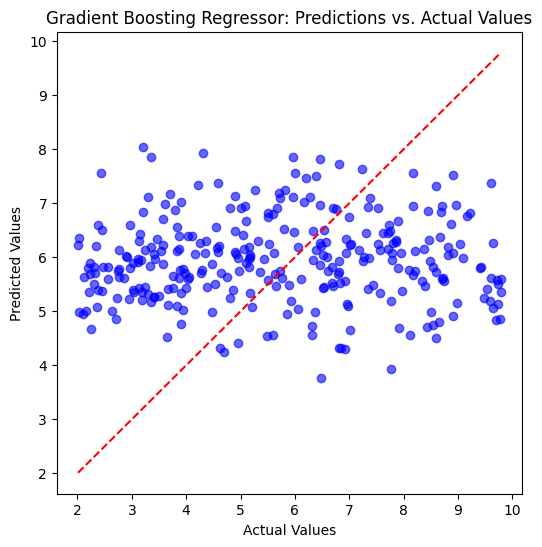

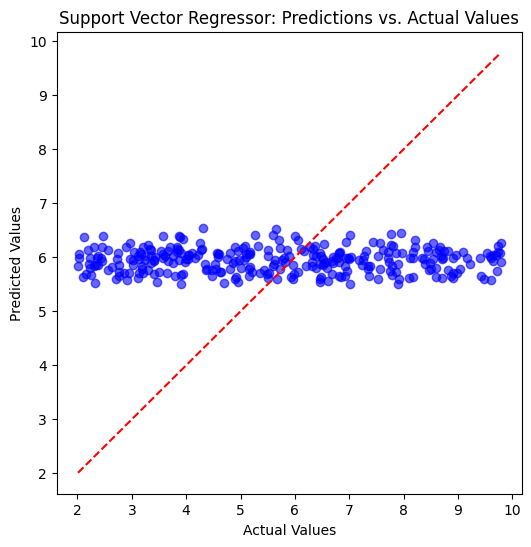

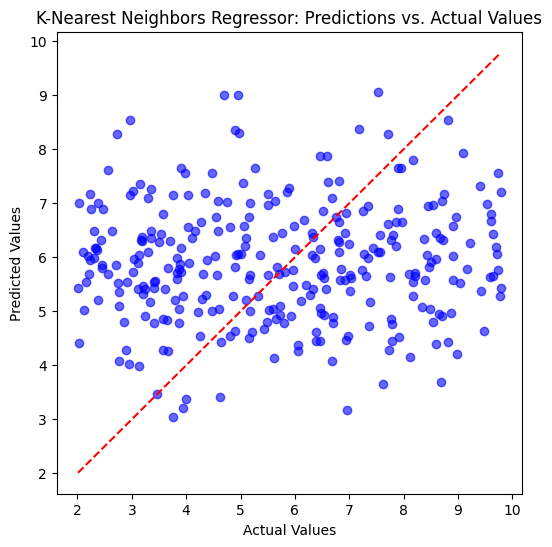

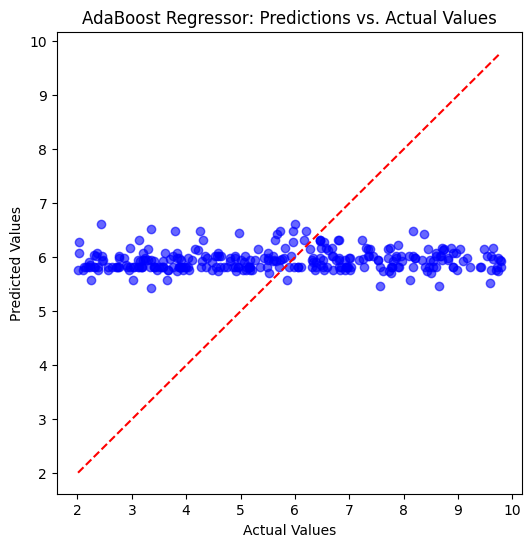

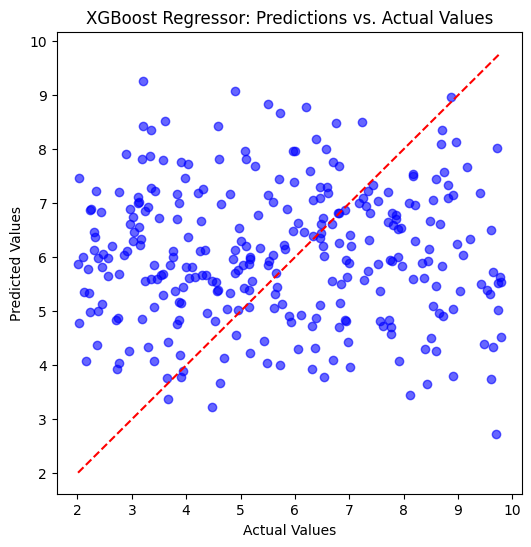

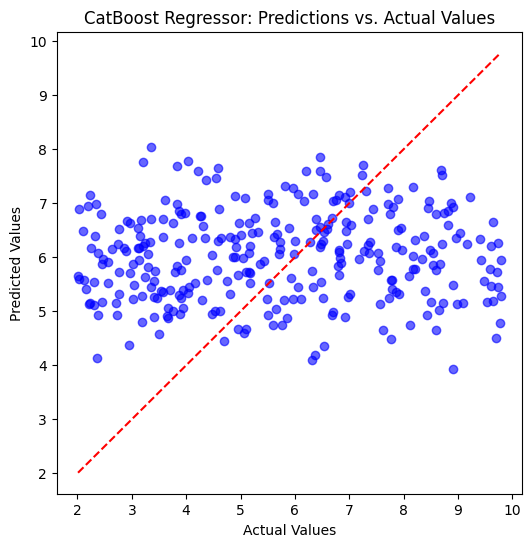

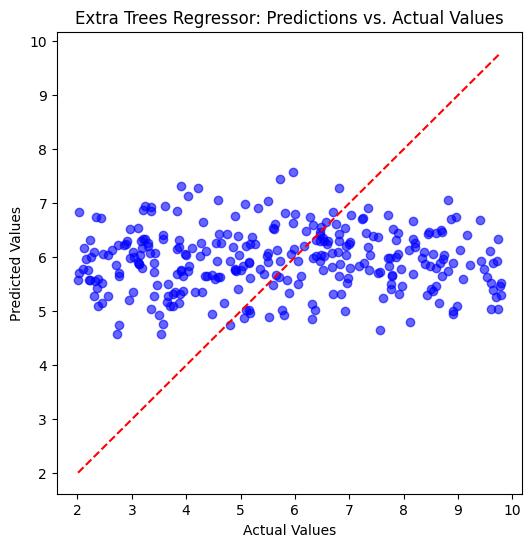

In [12]:
# Plot predictions vs. actual values for each model
import matplotlib.pyplot as plt

for model_name, model in models.items():
    predictions = model.predict(X_test)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, predictions, alpha=0.6, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
    plt.title(f"{model_name}: Predictions vs. Actual Values")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.show()
